In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
import sys
sys.path.append("../../src/common")
from pharmacy_common import PharmacyCommon
common = PharmacyCommon()

Check molecular weight distribution in Train dataset

In [ ]:
train_test_validation_path = "../../data/train_test_validation_data/XO_train_test_validation_data.xlsx"
train_dataset = pd.read_excel(train_test_validation_path, sheet_name='train_dataset')

In [3]:
def calculate_molecular_weight(smile):
    if pd.isna(smile):
        return float('nan')
    mol = Chem.MolFromSmiles(smile)
    if mol is None:
        return float('nan')
    molecular_weight = Chem.rdMolDescriptors.CalcExactMolWt(mol)
    return molecular_weight #Dalton
train_dataset["Molecular weight"] = train_dataset["SMILES"].apply(calculate_molecular_weight)

In [4]:
train_dataset.head(10)

,CID,SMILES,IC50(nM),Type,substructure,Molecular weight
0,145967694,CC1=CC2=C(C=C1)N=C(O2)/C(=N/O)/CC3=CC=CC=C3,17500.0,inactive,7,266.105528
1,76329670,CC1(C=CC2=CC(=C(C=C2O1)O)C(=O)/C=C/C3=CC(=C(C=...,1800.0,active,16,338.115424
2,5320686,C1=CC(=CC=C1/C=C/C(=O)OC[C@@H]2[C@H]([C@@H]([C...,100000.0,inactive,6,594.137341
3,155903284,C1=CC(=CC=C1C2=NC=NN2)NC(=O)C3C(NC(=O)NC3=O)O,1400.0,active,1,316.092003
4,137648214,CCCCC1=NN2C(=N1)C3=C(NC2=O)NN=C3,529.0,active,9,232.107259
5,156780202,C1=CC=C(C=C1)CN2C=C(C3=C2C=CC(=C3)NC(=O)C4=CC(...,820.0,active,3,369.122575
6,135463610,CCCCSC1=NC(=C(C(=O)N1)NC=O)N,100000.0,inactive,3,242.083747
7,156705027,C1=CC(=CC=C1COC2=C(C=C(C=C2)C3=NC=C4C(=N3)NNC4...,151.0,active,3,361.097503
8,162680022,C1=CN=C(C=C1NC(=O)C2C(NC(=O)NC2=O)O)C(=O)NO,73800.0,inactive,7,309.070933
9,24896701,CCC[C@H](C[C@@H]1[C@@H](C2=CC(=C(C(=C2C(=O)O1)...,612000.0,inactive,2,326.136553


In [5]:
train_molecular_weight = train_dataset['Molecular weight']
train_molecular_weight

0      266.105528
1      338.115424
2      594.137341
3      316.092003
4      232.107259
          ...    
332    308.125988
333    281.047027
334    309.122575
335    308.075684
336    360.120903
Name: Molecular weight, Length: 337, dtype: float64

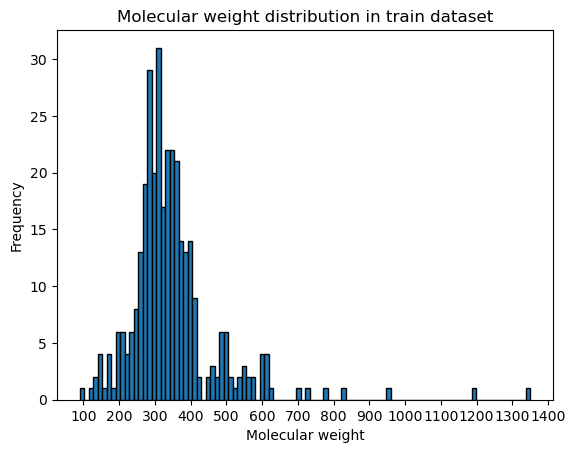

In [6]:
plt.hist(train_molecular_weight,bins=100, edgecolor="black")
plt.xticks(range(100, 1401, 100))
plt.xlabel("Molecular weight")
plt.ylabel("Frequency")
plt.title("Molecular weight distribution in train dataset")
plt.show()

Check if the SMILES are encodable

In [7]:
all_screening_data_path = "../../data/screening_dataset/all_screening_dataset.xlsx"
all_screening_dataset = pd.read_excel(all_screening_data_path)
print(len(all_screening_dataset))

45


In [8]:
maccs_fpts = common.gen_maccs_fpts(all_screening_dataset['SMILES'])
ecfp4_1024bits_fpts = common.gen_ecfp4_fpts(all_screening_dataset['SMILES'], 1024)
ecfp4_2048bits_fpts = common.gen_ecfp4_fpts(all_screening_dataset['SMILES'], 2048)
ecfp6_1024bits_fpts = common.gen_ecfp6_fpts(all_screening_dataset['SMILES'], 1024)
ecfp6_2048bits_fpts = common.gen_ecfp6_fpts(all_screening_dataset['SMILES'], 2048)

Progress:   0%|          | 0/45 [00:00<?, ?it/s][15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:49] DEPRECATION WARNING: please use MorganGenerator
[15:25:4

Calculate molecular weight in Screening dataset

In [5]:
all_screening_dataset.head(10)

,Code,SMILES
0,BS-1,OC[C@@H](O1)[C@@H](O)[C@H](O)[C@]1(CO)O[C@@H](...
1,BS-10,OC(C(C(C(COC(/C=C/C1=CC=C(O)C=C1)=O)O2)O)O)C2O...
2,BS-11,O=C1CC(C2=CC=C(O)C(O)=C2)OC3=C1C(O)=CC(OC4[C@@...
3,BS-12,COC1=C(O[C@H]2[C@H](O)[C@@H](O)[C@H](O)[C@@H](...
4,BS-13,O=C[C@@H]([C@H]([C@@H]([C@@H](COC(C1=CC(O)=C(O...
5,BS-14,O[C@@H]([C@@H]([C@@H](COC(C1=CC(O)=C(O)C(O)=C1...
6,BS-15,O=C1C=C(C2=CC=C(O)C(O)=C2)OC3=C1C(O)=CC(OC4[C@...
7,BS-16,COC1=C(O)C=C2[C@@H](C3=CC(OC)=C(O)C=C3)[C@@H](...
8,BS-17,O=C1OC2=C(C3=C1C=C(O)C(O)=C3OC4=O)C4=CC(O)=C2O
9,BS-18,O=C(O)[C@H](OC(/C=C/C1=CC(O)=C(O)C=C1)=O)CC2=C...


In [10]:
all_screening_dataset["Molecular Weight"] = all_screening_dataset['SMILES'].apply(calculate_molecular_weight)

In [15]:
all_screening_dataset.head(5)

,Code,SMILES,Molecular Weight
0,BS-1,OC[C@@H](O1)[C@@H](O)[C@H](O)[C@]1(CO)O[C@@H](...,342.116212
1,BS-10,OC(C(C(C(COC(/C=C/C1=CC=C(O)C=C1)=O)O2)O)O)C2O...,478.111126
2,BS-11,O=C1CC(C2=CC=C(O)C(O)=C2)OC3=C1C(O)=CC(OC4[C@@...,450.116212
3,BS-12,COC1=C(O[C@H]2[C@H](O)[C@@H](O)[C@H](O)[C@@H](...,522.210112
4,BS-13,O=C[C@@H]([C@H]([C@@H]([C@@H](COC(C1=CC(O)=C(O...,940.118181


In [ ]:
all_screen_dataset_df = pd.DataFrame(all_screening_dataset)
all_screen_dataset_df.to_excel("../../data/preprocessed_data/preprocessed_screening_dataset.xlsx", index=False)